# 1. Perkenalan

- Nama : Fahmi Suwandhi
- Batch : 10

- ### Context :

  > our ancestors said, "Indonesia has fertile soil" all kinds of fruits and vegetables can grow well in Indonesia. Currently, everyone is very concerned about their health, one of which is by consuming healthy foods such as fruits and vegetables.
  > Many people prefer to buy fruits or vegetables at traditional markets or supermarkets rather than buying them online.
however, the **problem is that sometimes it feels tired and annoying if you wait too long to pay at the cashier.**

> - I often grumble to myself :
> - 1. I don't buy fruits and vegetables for free, why do I have to queue at the cashier for so long?
> - 2. Isn't there something that makes it easier?

  > - Based on the problems above, I tried to use a neural network from image processing that can classify the types of fruit or vegetable

- ### Objective :

  > can make predictions using a neural network with image processing of fruits and vegetables to help fruit and vegetable supermarkets reduce overhead costs at the cashier and speed up the payment process


- You may download dataset from [kaggle](https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset)
- Check my model deployment in [here](https://ftds10-ml2p2-fahmi-suwandhi.herokuapp.com)

# 2. Import Library

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import glob
import cv2

import tensorflow as tf
import keras
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from tensorflow.keras.layers import Rescaling

from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!nvidia-smi #check what free nvidia we use,

Mon May 30 17:37:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 3. Data Loading

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

!mkdir ./kaggle
!mv ./kaggle.json ./kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

 94% 504M/534M [00:03<00:00, 191MB/s]
100% 534M/534M [00:03<00:00, 171MB/s]


In [ ]:
!unzip -q /content/vegetable-image-dataset.zip -d images_veg

# 4. EDA

In [ ]:
os.listdir('/content/images_veg/Vegetable Images')

['test', 'validation', 'train']

In [ ]:
main_path = '/content/images_veg/Vegetable Images'

In [ ]:
train_dir = os.path.join(main_path,'train')
val_dir = os.path.join(main_path,'validation')
test_dir = os.path.join(main_path,'test')

In [ ]:
LABELS = os.listdir(train_dir) #declaring the labels that exist in this dataset
print(f'The Classification that exist in this data sets are\n{list(LABELS)}\n\
In Total, There are {len(LABELS)} Classifications')

The Classification that exist in this data sets are
['Broccoli', 'Bean', 'Bottle_Gourd', 'Radish', 'Carrot', 'Cucumber', 'Brinjal', 'Cauliflower', 'Capsicum', 'Potato', 'Tomato', 'Papaya', 'Cabbage', 'Pumpkin', 'Bitter_Gourd']
In Total, There are 15 Classifications


This dataset only classifies 15 types of fruit or vegetables.

In [ ]:
#data train in each labels

#trainset
print('Train Set : \n' + '='*50)
for path, name, file in os.walk(train_dir):
  if path.split("/")[-1] != 'train':
    print(f'{len(file)} images classification as {path.split("/")[-1]}')


Train Set : 
1000 images classification as Broccoli
1000 images classification as Bean
1000 images classification as Bottle_Gourd
1000 images classification as Radish
1000 images classification as Carrot
1000 images classification as Cucumber
1000 images classification as Brinjal
1000 images classification as Cauliflower
1000 images classification as Capsicum
1000 images classification as Potato
1000 images classification as Tomato
1000 images classification as Papaya
1000 images classification as Cabbage
1000 images classification as Pumpkin
1000 images classification as Bitter_Gourd


In [ ]:
#data val in each labels

#validation
print('validatiom Set : \n' + '='*50)
for path, name, file in os.walk(val_dir):
  if path.split("/")[-1] != 'validation':
    print(f'There are {len(file)} images labeled as {path.split("/")[-1]}')

validatiom Set : 
There are 200 images labeled as Broccoli
There are 200 images labeled as Bean
There are 200 images labeled as Bottle_Gourd
There are 200 images labeled as Radish
There are 200 images labeled as Carrot
There are 200 images labeled as Cucumber
There are 200 images labeled as Brinjal
There are 200 images labeled as Cauliflower
There are 200 images labeled as Capsicum
There are 200 images labeled as Potato
There are 200 images labeled as Tomato
There are 200 images labeled as Papaya
There are 200 images labeled as Cabbage
There are 200 images labeled as Pumpkin
There are 200 images labeled as Bitter_Gourd


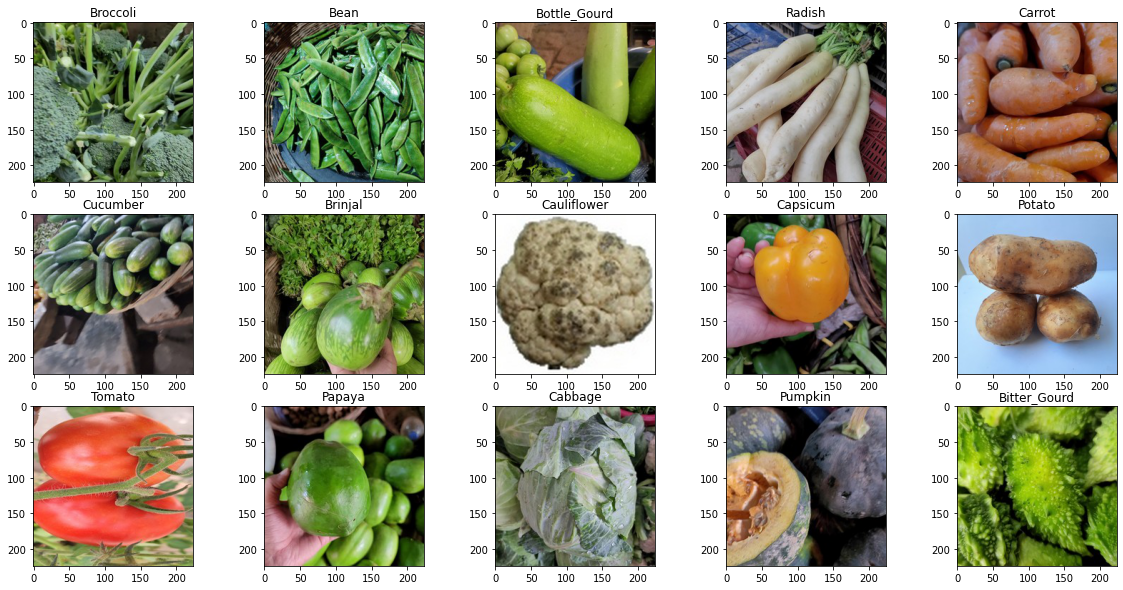

In [ ]:
# visualize sample images
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(20,10))
for y in range(3) :
  for x in range (5):
    sample = glob.glob(f"{train_dir}/{LABELS[y*5 + x]}/*.jpg")[0]
    ax[y, x].imshow(Image.open(sample))
    ax[y, x].set_title(f'{LABELS[y*5 + x]}')



- Explanation From EDA :
1. on each image has a height and width of 224x224
2. The picture of broccoli has a more dominant light green color
3. The bean image has a darker green color.
4. The bottle gourd picture has a green color and a bit of light yellow
5. Radish images have a dominant white color
6. the carrot image has a more dominant orange color
7. Cucumber's image has a green color and a few bright white lines
8. The image of brinjal has a more dominant green color.
9. the cauliflower image has a white to gray color
10. The capsicum image has an orange to yellow color.
11. the picture of potato has a more dominant brown color
12. The picture of a tomato has a bright red color
13. The papaya image has a more dominant green color and a few bright white lines.
14. the picture of cabbage has a pale green color
15. The pumpkin image has a green color and a bit of bright white
16. The bitter gourd image has a lighter green color.
- If we viewed from the visualization of images based on color which is represented on a scale of 0-225. dataset that we have so much green color. this can affect our model


# 5. Preprocessing

In [ ]:
img_height= 150
img_width= 150
SEED = 9
BATCH =64

In [ ]:
# Augmentasi data
train_datagen = ImageDataGenerator(
    rescale=1./255, #normalisasi pixel
    rotation_range=0.1,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, 
                                target_size=(img_height,img_width), batch_size= BATCH, 
                                seed=SEED, class_mode='categorical') #pipeline

val_generator = val_datagen.flow_from_directory(val_dir, target_size=(img_height,img_width),
                                batch_size= BATCH, seed=SEED, 
                                class_mode='categorical', shuffle=False) #pipeline

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_height,img_width),
                                batch_size= BATCH, seed=SEED, 
                                class_mode='categorical',shuffle=False) #pipeline


Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [ ]:
train_generator.class_indices

{'Bean': 0,
 'Bitter_Gourd': 1,
 'Bottle_Gourd': 2,
 'Brinjal': 3,
 'Broccoli': 4,
 'Cabbage': 5,
 'Capsicum': 6,
 'Carrot': 7,
 'Cauliflower': 8,
 'Cucumber': 9,
 'Papaya': 10,
 'Potato': 11,
 'Pumpkin': 12,
 'Radish': 13,
 'Tomato': 14}

In [ ]:
Pipline = train_generator.class_indices

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', 
                           patience = 5, 
                           restore_best_weights=True)]

# 6. Model Definition

In [ ]:
input= [img_height,img_width,3]

model = Sequential()
#Con 1
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu', input_shape = input))
model.add(MaxPool2D(pool_size=(2,2)))

#Conv 2
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Conv 3
model.add(Conv2D(filters = 126, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))



model.add(Flatten())
model.add(Dense(units= 256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=15, activation='softmax')) #output have 15 labels

model.compile(optimizer = 'adam',
              loss='categorical_crossentropy',
              metrics = 'accuracy')





# 7. Model Trainning

In [ ]:
history = model.fit(train_generator, epochs = 100, verbose=1, validation_data = val_generator, callbacks=callbacks)

Epoch 1/100
235/235 [==============================] - 102s 427ms/step - loss: 1.5832 - accuracy: 0.4665 - val_loss: 0.7817 - val_accuracy: 0.7383
Epoch 2/100
235/235 [==============================] - 96s 408ms/step - loss: 0.8044 - accuracy: 0.7343 - val_loss: 0.4413 - val_accuracy: 0.8537
Epoch 3/100
235/235 [==============================] - 96s 409ms/step - loss: 0.5460 - accuracy: 0.8264 - val_loss: 0.2903 - val_accuracy: 0.9047
Epoch 4/100
235/235 [==============================] - 95s 405ms/step - loss: 0.4154 - accuracy: 0.8673 - val_loss: 0.2145 - val_accuracy: 0.9280
Epoch 5/100
235/235 [==============================] - 95s 405ms/step - loss: 0.3160 - accuracy: 0.8991 - val_loss: 0.2325 - val_accuracy: 0.9297
Epoch 6/100
235/235 [==============================] - 95s 405ms/step - loss: 0.2882 - accuracy: 0.9105 - val_loss: 0.1535 - val_accuracy: 0.9550
Epoch 7/100
235/235 [==============================] - 95s 405ms/step - loss: 0.2861 - accuracy: 0.9121 - val_loss: 0.1169 

# 8. Model Evaluation

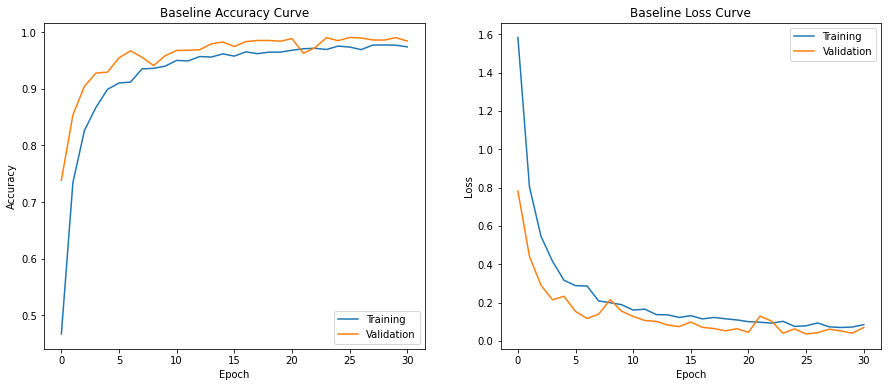

In [ ]:
metrics = pd.DataFrame(history.history) #create dataframe of history

#accuracy plot
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(metrics.accuracy, label='Training')
plt.plot(metrics.val_accuracy, label='Validation')
plt.title('Baseline Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#loss plot
plt.subplot(1, 2, 2)
plt.plot(metrics.loss, label='Training')
plt.plot(metrics.val_loss, label='Validation')
plt.title('Baseline Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

report_test = classification_report(test_generator.labels, 
                                    y_pred, labels = np.arange(15), 
                                    target_names= list(test_generator.class_indices.keys()))
print(report_test)

              precision    recall  f1-score   support

        Bean       0.98      0.99      0.99       200
Bitter_Gourd       0.99      0.99      0.99       200
Bottle_Gourd       1.00      1.00      1.00       200
     Brinjal       0.99      0.99      0.99       200
    Broccoli       0.98      0.99      0.99       200
     Cabbage       0.98      1.00      0.99       200
    Capsicum       0.99      0.99      0.99       200
      Carrot       1.00      1.00      1.00       200
 Cauliflower       1.00      0.98      0.99       200
    Cucumber       1.00      0.98      0.99       200
      Papaya       1.00      0.99      0.99       200
      Potato       1.00      1.00      1.00       200
     Pumpkin       0.99      0.99      0.99       200
      Radish       1.00      1.00      1.00       200
      Tomato       0.99      0.97      0.98       200

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99   

# 9. Model Improvement

In [ ]:


_input = tf.keras.layers.Input(shape=input)
x = _input

x = Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'elu')(x)
x = Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'elu')(x)
x = MaxPool2D(pool_size=(2,2))(x) #32


x = Conv2D(filters = 64, kernel_size = 3, padding = 'same',activation = 'elu')(x)
x = Conv2D(filters = 64, kernel_size = 3, padding = 'same',activation = 'elu')(x)
x = MaxPool2D(pool_size=(2,2))(x)#16

x = Conv2D(filters = 126, kernel_size = 3, padding = 'same',activation = 'elu')(x)
x = Conv2D(filters = 126, kernel_size = 3, padding = 'same',activation = 'elu')(x)
x = MaxPool2D(pool_size=(2,2))(x)#126


x = Conv2D(filters = 256, kernel_size = 3, padding = 'same',activation = 'elu')(x)
x = MaxPool2D(pool_size=(2,2))(x)#256



x = Flatten()(x)
x = Dense(568, activation='elu')(x) #use better activation
x = Dropout(0.25)(x)

x = Dense(15, activation='softmax')(x) #output

model_improv = tf.keras.models.Model(_input, x)

model_improv.summary()



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 64)        36928     
                                                           

In [ ]:
model_improv.compile(optimizer=tf.keras.optimizers.Adam(epsilon=0.01), 
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

history_improv = model_improv.fit(train_generator, validation_data = val_generator, 
                    callbacks = callbacks, epochs = 100)



Epoch 1/100
235/235 [==============================] - 103s 433ms/step - loss: 1.8958 - accuracy: 0.3647 - val_loss: 1.1394 - val_accuracy: 0.6187
Epoch 2/100
235/235 [==============================] - 101s 430ms/step - loss: 1.1971 - accuracy: 0.5989 - val_loss: 0.7030 - val_accuracy: 0.7657
Epoch 3/100
235/235 [==============================] - 106s 453ms/step - loss: 0.8725 - accuracy: 0.7126 - val_loss: 0.5443 - val_accuracy: 0.8210
Epoch 4/100
235/235 [==============================] - 101s 429ms/step - loss: 0.6652 - accuracy: 0.7839 - val_loss: 0.6316 - val_accuracy: 0.7873
Epoch 5/100
235/235 [==============================] - 104s 442ms/step - loss: 0.5093 - accuracy: 0.8330 - val_loss: 0.2617 - val_accuracy: 0.9147
Epoch 6/100
235/235 [==============================] - 101s 428ms/step - loss: 0.4163 - accuracy: 0.8683 - val_loss: 0.6658 - val_accuracy: 0.8067
Epoch 7/100
235/235 [==============================] - 101s 429ms/step - loss: 0.3584 - accuracy: 0.8903 - val_loss: 0

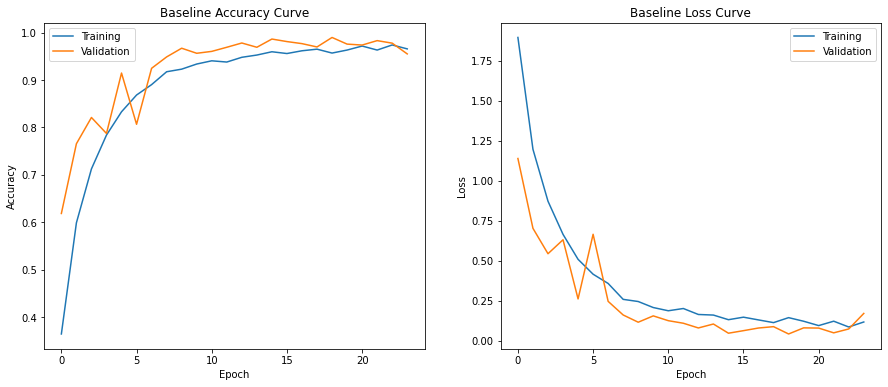

In [ ]:
metrics = pd.DataFrame(history_improv.history) #create dataframe of history

#accuracy plot
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(metrics.accuracy, label='Training')
plt.plot(metrics.val_accuracy, label='Validation')
plt.title('Baseline Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#loss plot
plt.subplot(1, 2, 2)
plt.plot(metrics.loss, label='Training')
plt.plot(metrics.val_loss, label='Validation')
plt.title('Baseline Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model_improv.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

report_test = classification_report(test_generator.labels, 
                                    y_pred, labels = np.arange(15), 
                                    target_names= list(test_generator.class_indices.keys()))
print(report_test)

              precision    recall  f1-score   support

        Bean       0.96      0.99      0.98       200
Bitter_Gourd       0.97      0.98      0.97       200
Bottle_Gourd       0.99      0.98      0.99       200
     Brinjal       0.97      0.95      0.96       200
    Broccoli       1.00      0.93      0.96       200
     Cabbage       0.97      0.97      0.97       200
    Capsicum       1.00      1.00      1.00       200
      Carrot       0.99      1.00      1.00       200
 Cauliflower       0.95      0.99      0.97       200
    Cucumber       0.99      0.96      0.98       200
      Papaya       0.94      0.98      0.96       200
      Potato       1.00      0.99      1.00       200
     Pumpkin       0.99      0.98      0.99       200
      Radish       0.99      0.99      0.99       200
      Tomato       0.99      0.97      0.98       200

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98   

# 10. Save Model

In [ ]:
# model.save('model_relu.h5') # save first model

In [ ]:
# model_improv.save('model_improv.h5') #save model so we don't have to re run the training model

In [ ]:
Cons_model = keras.models.load_model("/content/model_relu.h5") #test for loading data

In [ ]:
constructed_model = keras.models.load_model("/content/model_improv.h5") #test for loading data

In [ ]:
#save dict label for deployment purpose
import pickle
with open ("pipeline.pkl", "wb") as f :
    pickle.dump(Pipline, f)

# 11. Model Inference

In [ ]:
from google.colab import files
def predict() :
  uploaded = files.upload()

  for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150,150)) #inget mesti sesuai input yg sebelumnya
    plt.imshow(img)
    plt.axis('Off')
    plt.show()
    x = image.img_to_array(img) # untuk ubah image kedalam array
    x = np.expand_dims(x, axis=0) #Memperluas bentuk array misal 1D jadi 2D, 0 berarti baris/horizontal [[1, 2]]

    images = np.vstack([x])
    classes = model.predict(images) #gunakan model yang terbaik misal yg variable my_model untuk predict images
    classes = np.argmax(classes, axis = 1)
    labels = list(train_generator.class_indices.keys())
    print(f'This is a {labels[classes.item()]} Image')

Saving tonat train.jpg to tonat train.jpg


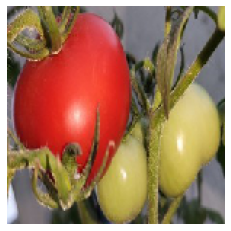

This is a Tomato Image


In [ ]:
predict()

Saving radish train.jpg to radish train.jpg


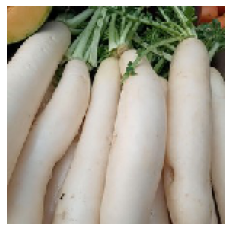

This is a Cauliflower Image


In [ ]:
predict()

Saving potato train.jpg to potato train.jpg


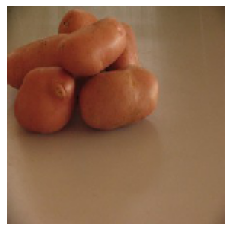

This is a Potato Image


In [ ]:
predict()

Saving papaya train.jpg to papaya train.jpg


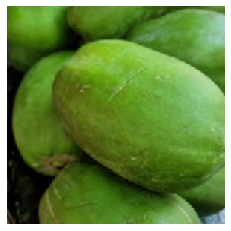

This is a Cucumber Image


In [ ]:
predict()

Saving Cauliflower train.jpg to Cauliflower train.jpg


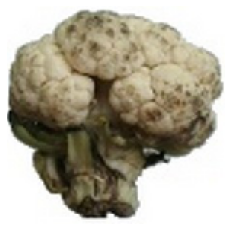

This is a Cauliflower Image


In [ ]:
predict()

Saving Capsicum train.jpg to Capsicum train.jpg


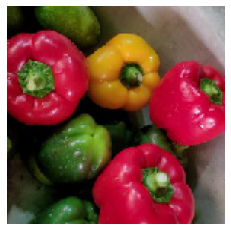

This is a Capsicum Image


In [ ]:
predict()

# 12. Conclusion

#### 12.1 Data Analysis

  > - There are 15 calssification vegetables of fruits here : Broccoli, Bean, Bottle Gourd, Radish, Carrot, Cucumber, Brinjal, Cauliflower, 'Capsicum', Potato, Tomato, Papaya, Cabbage, Pumpkin, Bitter_Gourd
  > - Size of image is 224x224 with 15.000 images in trainset
  > - This image has a lot of green as majority color
  > - Some images has low staturation that can be affect of the result model

#### 12.2 Model Analysis

  > - My Baseline model use sequential API and set up convolution in 3 with activation relu, set up dropout in 0.25 for randomly and using optimizer = Adam
  > - In Baseline model we have accuracy in 99% and loss 8% with predict data test and i think this is good enought for my baseline model.
  > - some picture has a pretty close with model prediction
  > - Improved model about just change activation with elu and increasing 1 layers.
  > - But model improved show decreasing accuracy and loss. so i choose my baseline model as my prediction

#### 12.3 Limitation

  > - This dataset only classifies 15 vegetables or fruits, while in a market there are various kinds of fruits and vegetables, for the next project we will try to add the classification of fruits and vegetables to make them more related.
  > - Due to the fact that many types of fruits and vegetables are mostly green in color, we may determine the edge detection before the training model is carried out.
  > - there are some images that are contaminated with colors in the background, so we can use object detection so that the model can focus more on the object that we will predict
  > - In fact, in supermarkets we not only need the classification of an object but we need the price of the object. for the next project maybe we will calculate the weight x price to be more representative